In [2]:
library("scMultiSim")
library(anndata)
library(ape)

https://zhanglabgt.github.io/scMultiSim/doc/basics.html


Phylogenetic tree with 10 tips and 9 internal nodes.

Tip labels:
  1, 2, 3, 4, 5, 6, ...

Rooted; includes branch lengths.

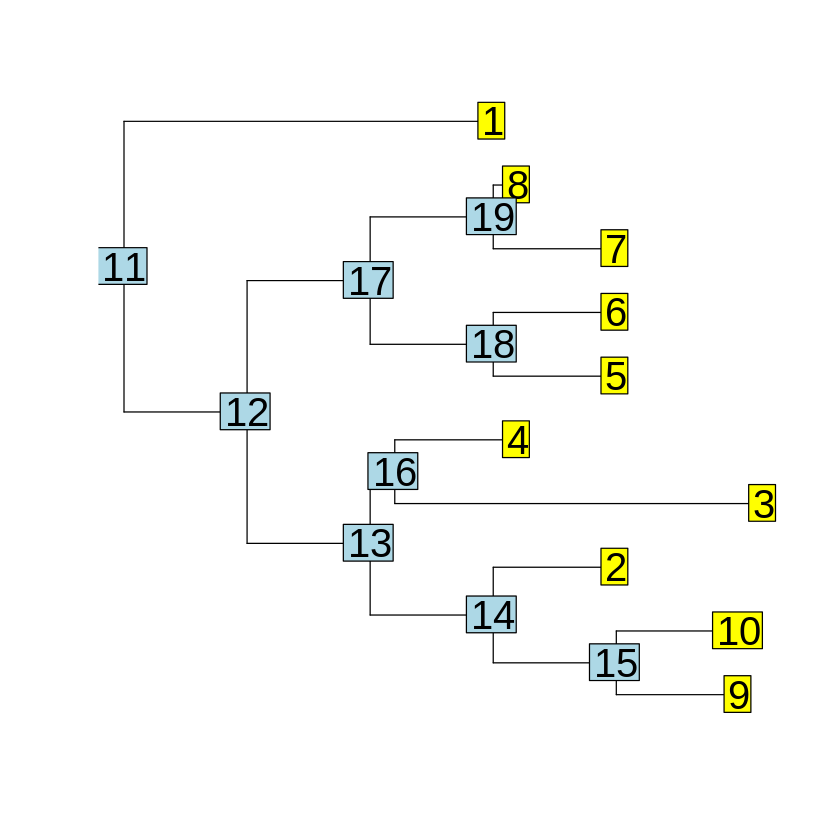

In [3]:
#' Phyla10()
Phyla10 <- function(plotting = FALSE) {
  phyla <- rtree(2)
  phyla <- compute.brlen(phyla, 1)
  tip <- compute.brlen(phyla, 1)
  phyla <- bind.tree(phyla, tip, 1)
  phyla <- bind.tree(phyla, tip, 2)
  phyla <- bind.tree(phyla, tip, 2)
  phyla <- bind.tree(phyla, tip, 2)
  phyla <- bind.tree(phyla, tip, 2)
  phyla <- bind.tree(phyla, tip, 2)
  phyla <- bind.tree(phyla, tip, 2)
    phyla <- bind.tree(phyla, tip, 2)
  phyla <- compute.brlen(phyla, c(rep(1, 7), 0.2, 3))
  edges <- cbind(phyla$edge, phyla$edge.length)
  edges <- cbind(seq_along(edges[, 1]), edges)
  connections <- table(c(edges[, 2], edges[, 3]))
  root <- as.numeric(names(connections)[connections == 2])
  tips <- as.numeric(names(connections)[connections == 1])
  phyla$tip.label <- as.character(tips)
  if (plotting == TRUE) {
    plot(phyla, show.tip.label = FALSE, lwd = 2)
    tiplabels(cex = 2)
    nodelabels(cex = 2)
  }
  return(phyla)
}

Phyla10(plotting = TRUE)

In [4]:
save_h5ad_wBatches <- function(results, path, rna_file, atac_file) {
  # Create an AnnData object for RNA data
  rna_data <- AnnData(X = t(results$counts_with_batches))
  rna_data$obs_names <- results$cell_meta$cell_id
  #rna_data$var_names <- NULL
  rna_data$obs[['cell_type']] <- results$cell_meta$pop
  rna_data$obs[['batch']] <- results$cell_meta$batch
  rna_data$obs[['domain']] <- "scRNA-seq"
  rna_data$obs[['protocol']] <- "Simulated RNA"
  rna_data$obs["dataset"] = rna_file
  
  # Create an AnnData object for ATAC data
  atac_data <- AnnData(X = t(results$atac_with_batches))
  atac_data$obs_names <- results$cell_meta$cell_id
  #atac_data$var_names <- NULL
  atac_data$obs[['cell_type']] <- results$cell_meta$pop
  atac_data$obs[['batch']] <- results$cell_meta$batch
  atac_data$obs[['domain']] <- "scATAC-seq"
  atac_data$obs[['protocol']] <- "Simulated ATAC"
  atac_data$obs["dataset"] = atac_file

  # Save RNA data to .h5ad file
  write_h5ad(rna_data, filename = paste0(path, rna_file))

  # Save ATAC data to .h5ad file
  write_h5ad(atac_data, filename = paste0(path, atac_file))
}


In [80]:
path <- "../datasets/"
trees <- list(Phyla3(), Phyla5(), Phyla10())
num_cells <- c(4000, 10000, 20000) # number of cells are the sum of RNA+ATAC
num_batches <- c(2, 3, 5)
num_genes <- c(1000, 2000, 3000)

In [ ]:
options_list <- list()

# Loop through combinations
for (tree in trees) {
  for (num_cell in num_cells) {
    for (num_batch in num_batches) {
      for (num_gene in num_genes) {
        options <- list(
          rand.seed = 0,
          GRN = NA,
          num.genes = num_gene,
          num.cells = num_cell,
          num.cifs = 50,
          cif.sigma = 0.5,
          tree = tree,
          discrete.cif = TRUE,
          diff.cif.fraction = 0.8,
          do.velocity = FALSE
        )
        
        generated_data <- sim_true_counts(options)
        add_expr_noise(generated_data)
        divide_batches(generated_data, nbatch = num_batch)
        rna_name <- paste0("simulated_num_cell_", num_cell/2, "_num_batch_", num_batch, "_num_gene_", num_gene, "-RNA.h5ad")
        atac_name <- paste0("simulated_num_cell_", num_cell/2, "_num_batch_", num_batch, "_num_gene_", num_gene, "-ATAC.h5ad")
        save_h5ad_wBatches(generated_data, path, rna_name, atac_name)
      }
    }
  }
}



In [10]:
names(generated_data)

[1] ".grn"                ".options"            ".n"                 
 [4] "region_to_gene"      "atacseq_data"        "giv"                
 [7] "kinetic_params"      "counts_obs"          "num_genes"          
[10] "atacseq_obs"         "cif"                 "counts_with_batches"
[13] "hge_scale"           "counts"              "cell_meta"          
[16] "atac_counts"         "grn_params"          "atac_with_batches"

In [16]:
head(generated_data$cell_meta)

,cell_id,pop,batch
,<chr>,<int>,<int>
cell1,cell1,1,3
cell2,cell2,1,1
cell3,cell3,1,2
cell4,cell4,1,2
cell5,cell5,1,1
cell6,cell6,1,3
